In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from EntradaDeDadosDisposicaoLongitudinal import EntradaDeDadosDisposicaoLongitudinal 


In [18]:

TI = time.process_time()
# Call the data entry function
Xc, Yc, INC, Nc, gamma_c, sigma_min, sigma_max, dp, eta, F = EntradaDeDadosDisposicaoLongitudinal()
# The above function is not defined in the provided code, so I'll assume these variables are globally defined
AREA = 0
Sx = 0
Sy = 0
for I in range(Nc):
    ai = Xc[I] * Yc[I+1] - Xc[I+1] * Yc[I]
    AREA += ai
    Sx += ai * (Yc[I] + Yc[I+1])
    Sy += ai * (Xc[I] + Xc[I+1])
AREA /= 2
Sx /= 6
Sy /= 6
Xcg = Sy / AREA
Ycg = Sx / AREA
# Translation of coordinates
for I in range(Nc+1):
    Xc[I] -= Xcg
    Yc[I] -= Ycg
AREA = 0
Sx = 0
Sy = 0
Ixx = 0
Iyy = 0
Ixy = 0
for I in range(Nc):
    ai = Xc[I] * Yc[I+1] - Xc[I+1] * Yc[I]
    AREA += ai
    Sx += ai * (Yc[I] + Yc[I+1])
    Sy += ai * (Xc[I] + Xc[I+1])
    Ixx += ai * (Yc[I]**2 + Yc[I] * Yc[I+1] + Yc[I+1]**2)
    Iyy += ai * (Xc[I]**2 + Xc[I] * Xc[I+1] + Xc[I+1]**2)
    Ixy += ai * (Xc[I] * Yc[I+1] + 2 * (Xc[I] * Yc[I] + Xc[I+1] * Yc[I+1]) + Xc[I+1] * Yc[I])
SINAL_DA_CIRCUICAO = AREA
if SINAL_DA_CIRCUICAO > 0:
    AREA /= 2
    Sx /= 6
    Sy /= 6
    Ixx /= 12
    Iyy /= 12
    Ixy /= 24
else:
    AREA /= -2
    Sx /= -6
    Sy /= -6
    Ixx /= -12
    Iyy /= -12
    Ixy /= -24
yb = abs(min(Yc))
yt = abs(max(Yc))
I = Ixx
Wb = I/yb
Wt = I/yt
kb = Wt/AREA
kt = Wb/AREA




Fase 1:
	Momento fletor máximo: 54298.75000000001 kN.cm
	Posição do momento fletor máximo: 1100.0 cm
Fase 2:
	Momento fletor máximo: 93623.75 kN.cm
	Posição do momento fletor máximo: 1100.0 cm


e >= 60.0671173306454 cm
e <= 60.08161559888579 cm


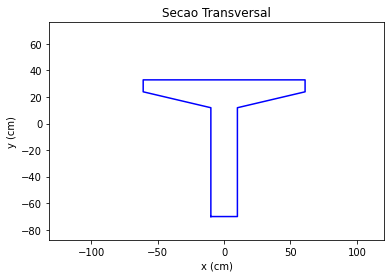

In [19]:
L = 2200  # cm
q_load = 0.065  # kN/cm2
Lspan = np.linspace(0, L, L+1)
g = np.zeros((len(Lspan), len(eta)))
q = np.zeros((len(Lspan), len(eta)))
M = np.zeros((len(Lspan), len(eta)))

for z in range(len(Lspan)):
    g[z, 0] = gamma_c * AREA
    g[z, 1] = gamma_c * AREA
    q[z, 0] = 0
    q[z, 1] = q_load
    M[z, 0] = abs((g[z, 0] + q[z, 0]) * Lspan[z]**2 / 2 - gamma_c * AREA * L / 2 * Lspan[z])
    M[z, 1] = abs((g[z, 1] + q[z, 1]) * Lspan[z]**2 / 2 - (gamma_c * AREA + q_load) * L / 2 * Lspan[z])

M_cric = np.zeros(len(eta))
z_cric = np.zeros(len(eta))
e_min = np.zeros((len(Lspan), len(eta)*2+1))
e_max = np.zeros((len(Lspan), len(eta)*2+1))
e_min_cric = np.zeros(len(eta)*2+1)
e_max_cric = np.zeros(len(eta)*2+1)

for i in range(len(eta)):
    M_cric[i], z_cric[i] = np.max(M[:, i]), np.argmax(M[:, i])
    print(f'Fase {i+1}:')
    print(f'\tMomento fletor máximo: {M_cric[i]} kN.cm')
    print(f'\tPosição do momento fletor máximo: {Lspan[int(z_cric[i])]} cm')

    e_min[:, 2*i] = 1 / F[i] * (M[:, i] + Wb * sigma_min[i]) - kt
    e_min[:, 2*i + 1] = 1 / F[i] * (M[:, i] - Wt * sigma_max[i]) + kb
    e_max[:, 2*i] = 1 / F[i] * (M[:, i] + Wb * sigma_max[i]) - kt
    e_max[:, 2*i + 1] = 1 / F[i] * (M[:, i] - Wt * sigma_min[i]) + kb
    e_min_cric[2*i] = 1 / F[i] * (M_cric[i] + Wb * sigma_min[i]) - kt
    e_min_cric[2*i + 1] = 1 / F[i] * (M_cric[i] - Wt * sigma_max[i]) + kb
    e_max_cric[2*i] = 1 / F[i] * (M_cric[i] + Wb * sigma_max[i]) - kt
    e_max_cric[2*i + 1] = 1 / F[i] * (M_cric[i] - Wt * sigma_min[i]) + kb

e_min[:, len(eta)*2] = -(yt - dp)
e_max[:, len(eta)*2] = yb - dp
e_min_cric[len(eta)*2] = -(yt - dp)
e_max_cric[len(eta)*2] = yb - dp

e_min_z = np.max(e_min, axis=1)  # Find the maximum of each row in e_min
e_max_z = np.min(e_max, axis=1)  # Find the minimum of each row in e_max

e_min_f = np.max(e_min_cric)
e_max_f = np.min(e_max_cric)

print('\n')
print(f'e >= {e_min_f} cm')
print(f'e <= {e_max_f} cm')

plt.figure(1)
plt.plot(Xc, Yc, '-b')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Secao Transversal')
plt.axis('equal')
plt.xlim([min(min(Xc), min(Yc))*1.25, max(max(Xc), max(Yc))*1.25])
plt.ylim([min(min(Xc), min(Yc))*1.25, max(max(Xc), max(Yc))*1.25])
plt.show()

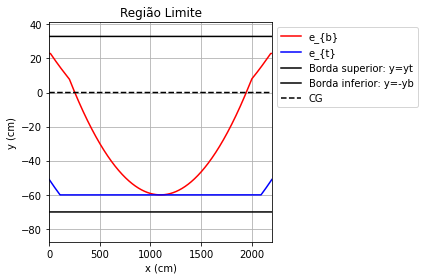

In [20]:
plt.figure(2)
plt.plot(Lspan, -e_min_z, '-r', Lspan, -e_max_z, '-b', Lspan, yt*np.ones(len(Lspan)), '-k', Lspan, -yb*np.ones(len(Lspan)), '-k', Lspan, np.zeros(len(Lspan)), '--k')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Região Limite')
plt.legend(['e_{b}', 'e_{t}','Borda superior: y=yt', 'Borda inferior: y=-yb', 'CG'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim([0, L])
plt.ylim([-yb*1.25, yt*1.25])
plt.grid(True)
plt.tight_layout()
plt.show()